## A Seperate Handbook is provided with detailed discription of the Code

#### The following line is one time code for installing pandas_datareader

In [1]:
#pip install pandas_datareader


In [2]:
# This code will filter out all the warnings
import warnings
warnings.filterwarnings('ignore')

### Import the Necessary Libraries

In [3]:
import pandas_datareader as web
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import date


### Import data using pandas_datareader. Select data range of your choice

In [4]:
df=web.DataReader('GOOGL',data_source='yahoo',start='2012-01-01',end='2020-04-30')

## Basic EDA

In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-24,1277.709961,1244.000000,1255.000000,1276.599976,1872000.0,1276.599976
2020-04-27,1294.099976,1265.060059,1292.000000,1270.859985,2209300.0,1270.859985
2020-04-28,1284.760010,1230.380005,1283.199951,1232.589966,4035000.0,1232.589966
2020-04-29,1360.150024,1326.729980,1345.000000,1342.180054,5417900.0,1342.180054
2020-04-30,1350.000000,1321.500000,1331.359985,1346.699951,2789200.0,1346.699951


In [6]:
df.shape

(2095, 6)

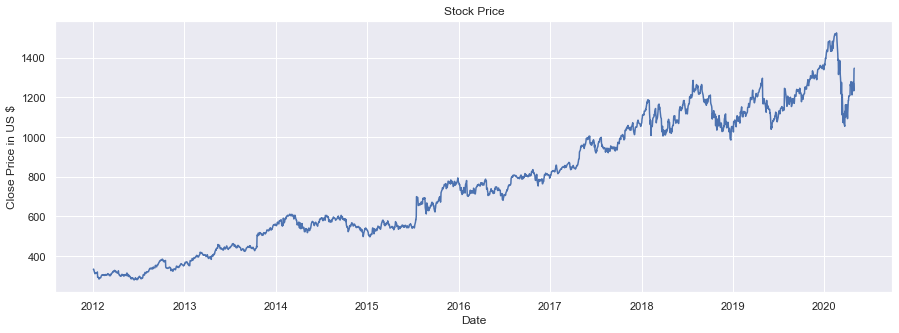

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df.Close)
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price in US $");


## Seperate out the Close Column as we will be working on the Closing Values

In [8]:
close=df.filter(['Close'])

In [9]:
close.head()

,Close
Date,
2012-01-03,333.038025
2012-01-04,334.474487
2012-01-05,329.834839
2012-01-06,325.335327
2012-01-09,311.541534


In [10]:
# change the Values to Numpy Array
close_stock=close.values

In [11]:
type(close_stock)

numpy.ndarray

## Prepare & Scale  the Training Data

In [12]:
training_data_length=math.ceil(len(close_stock)*0.8)

In [13]:
training_data_length

1676

In [14]:
mms=MinMaxScaler(feature_range=(0, 1))

In [15]:
scaled_close_stock=mms.fit_transform(close_stock)

In [16]:
training_data=scaled_close_stock[0:training_data_length,:]

In [17]:
len(training_data)

1676

In [18]:
training_data

array([[0.04275536],
       [0.04390909],
       [0.04018266],
       ...,
       [0.78426834],
       [0.77590731],
       [0.79099892]])

### Make X_train & y_train

In [19]:
X_train=[]
y_train=[]

In [20]:
for i in range(60 ,len(training_data)):
    X_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])

### Change X_train and y_train to NumPy arrays

In [21]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [22]:
print(type(X_train))
print(type(y_train))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
print(X_train.ndim)
print(X_train.shape)

2
(1616, 60)


### RNN needs data in 3 dimensions , number of Samples, Number of Time Steps and Number of Features So wee need to reshape the data

In [24]:
print(X_train.shape)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

(1616, 60)


# Make the LSTM Architecture

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [26]:
model = Sequential()

In [27]:
X_train.shape

(1616, 60, 1)

### input_shape = number of time steps and number of features. In this case number of features is 1

In [28]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))


In [29]:
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
1616/1616 [==============================] - 6s 3ms/step - loss: 0.0104
Epoch 2/50
1616/1616 [==============================] - 4s 3ms/step - loss: 6.6835e-04
Epoch 3/50
1616/1616 [==============================] - 4s 3ms/step - loss: 6.0935e-04
Epoch 4/50
1616/1616 [==============================] - 4s 3ms/step - loss: 5.9884e-04
Epoch 5/50
1616/1616 [==============================] - 4s 3ms/step - loss: 6.2310e-04
Epoch 6/50
1616/1616 [==============================] - 4s 3ms/step - loss: 5.8073e-04
Epoch 7/50
1616/1616 [==============================] - 5s 3ms/step - loss: 5.5968e-04
Epoch 8/50
1616/1616 [==============================] - 4s 3ms/step - loss: 5.4200e-04
Epoch 9/50
1616/1616 [==============================] - 4s 2ms/step - loss: 6.0178e-04
Epoch 10/50
1616/1616 [==============================] - 4s 2ms/step - loss: 5.7981e-04
Epoch 11/50
1616/1616 [==============================] - 4s 2ms/step - loss: 5.6903e-04
Epoch 12/50
1616/1616 [======================

## Prepare & reshape the Test Data

In [31]:
test_data=scaled_close_stock[training_data_length-60:,:]


In [32]:
training_data_length

1676

In [33]:
len(test_data)

479

In [34]:
X_test=[]
y_test=close_stock[training_data_length:,:]

In [35]:
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [36]:
len(X_test)

419

In [37]:
X_test=np.array(X_test)

In [38]:
X_test.shape

(419, 60)

In [39]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Make Predictions

In [40]:
y_pred=model.predict(X_test)


In [41]:
y_pred=mms.inverse_transform(y_pred)

In [42]:
pd.DataFrame(y_pred)

,0
0,1240.207764
1,1238.413940
2,1223.148071
3,1200.273438
4,1182.221558
...,...
414,1234.215820
415,1257.007446
416,1262.414429
417,1237.210449


## Plot the Data

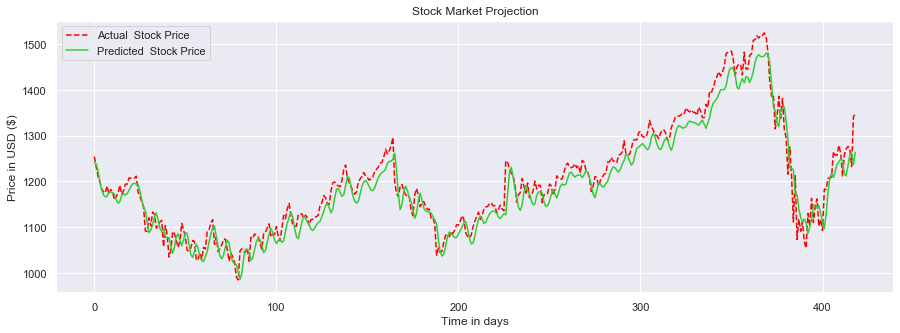

In [43]:
# Visualising the results
plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'red', label = 'Actual  Stock Price',ls='--')
plt.plot(y_pred, color = 'limegreen', label = 'Predicted  Stock Price',ls='-')
plt.title('Stock Market Projection')
plt.xlabel('Time in days')
plt.ylabel('Price in USD ($)')
plt.legend()
plt.show()

## Plot the whole Data Training, Testing and Prediction Data together

In [44]:
train=close[:training_data_length]
test=close[training_data_length:]
test['pred']=y_pred

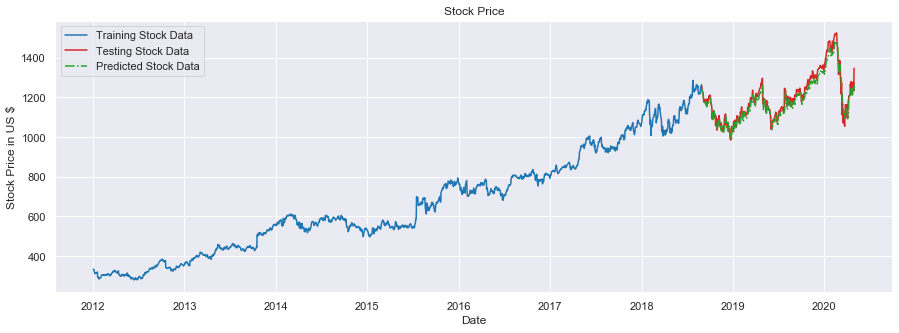

In [45]:
plt.figure(figsize=(15,5))
plt.plot(train['Close'], color = 'tab:blue', label = 'Training Stock Data',ls='-')
plt.plot(test['Close'], color = 'tab:red', label = 'Testing Stock Data',ls='-')
plt.plot(test['pred'], color = 'tab:green', label = 'Predicted Stock Data',ls='dashdot')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price in US $')
plt.legend()
plt.show()